In [1]:
# load gene ontology and human GAF
from ddot.Ontology import parse_obo
parse_obo('go-basic.obo', output_file = 'go.ddot', id2name_file = 'go_id2name.ddot', id2namespace_file = 'go_id2namespace.ddot')
from ddot.Ontology import parse_gaf
gaf = parse_gaf('goa_human.gaf')
from ddot import Ontology
go = Ontology.from_table('go.ddot', mapping = gaf, mapping_parent = 'GO ID', mapping_child = 'DB Object Symbol', propagate = None)

/cellar/users/hsher/miniconda3/envs/ddot/lib/python3.7/site-packages/ddot/Ontology.py:387: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  pd.Series(id2name).to_csv(id2name_file, sep='\t')
/cellar/users/hsher/miniconda3/envs/ddot/lib/python3.7/site-packages/ddot/Ontology.py:388: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  pd.Series(id2namespace).to_csv(id2namespace_file, sep='\t')
/cellar/users/hsher/miniconda3/envs/ddot/lib/python3.7/site-packages/ddot/Ontology.py:389: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass 

In [2]:
# import pacakge
import sys
sys.path.append('/cellar/users/hsher/ontoPrune')
from ontoPrune.entropy import *

In [3]:
go_count = count_gene(go)

/cellar/users/hsher/ontoPrune/ontoPrune/entropy.py:32: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ont_count = pd.concat([dir_count, indir_count, term_count], axis = 1)


# How many times do we need to remove 1 term-term, 1 gene per term?

In [4]:
term_count = []
for n_iter in range(8):
    print('running iteration {}'.format(n_iter))
    delete_empty_term(go, go_count)
    term_count.append(len(go.terms))
    go_count = count_gene(go) # after go term deletion need to re count since some terms are gone


running iteration 0
running iteration 1
running iteration 2
running iteration 3
running iteration 4
running iteration 5
running iteration 6
running iteration 7


Text(0.5, 0, 'No. iteration')

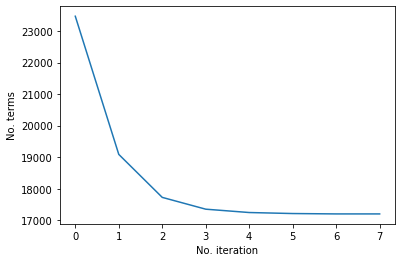

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(term_count)
plt.ylabel('No. terms')
plt.xlabel('No. iteration')
# gradually set to ~17000 terms

In [11]:
go_count.loc[go_count['indirect gene count']==1] # no term has one gene

,direct gene count,indirect gene count,term count,normalized entropy


In [12]:
go_count.loc[go_count['indirect gene count']==0] # no term has 0 gene

,direct gene count,indirect gene count,term count,normalized entropy


In [13]:
go_count.loc[go_count['direct gene count']+go_count['term count'] == 1] # no term has only 1 child

,direct gene count,indirect gene count,term count,normalized entropy


# Calculate Entropy

In [15]:
go_table = go.to_table()
n = 0
for term in go.terms:
    if n%1000 == 0:
        print('calculating term {}'.format(n))
    go_count.loc[term, 'normalized entropy'] = one_term_entropy(term, go_table,go_count)
    n+=1

calculating term 0
calculating term 1000
calculating term 2000
calculating term 3000
calculating term 4000
calculating term 5000
calculating term 6000
calculating term 7000
calculating term 8000
calculating term 9000
calculating term 10000
calculating term 11000
calculating term 12000
calculating term 13000
calculating term 14000
calculating term 15000
calculating term 16000
calculating term 17000


In [16]:
# save entropy
go_count.to_pickle('~/ontoPrune/data/term_entorpy.pickle')
go_count.to_csv('~/ontoPrune/data/term_entorpy.csv')
# save trimmed go
go.to_pickle('~/ontoPrune/data/prune_go.pickle')

In [17]:
go_count.head()

,direct gene count,indirect gene count,term count,normalized entropy
GO:0000002,12.0,22,1.0,0.734947
GO:0000003,5.0,1462,3.0,0.517207
GO:0000010,2.0,2,0.0,1.000000
GO:0000012,12.0,13,2.0,0.969207
GO:0000014,10.0,11,1.0,0.963938
